In [95]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
# Read the file

filename = "Raw_Data/season1.json"
with open(filename, "r") as data_file:
    data = json.load(data_file)

In [99]:
# Extract files and set up

season1 = {}
counter = 1
lines = []
eptitles = []
for x in data.keys():
    eptitles.append(x)
    for key, line in data[x].items():
        lines.append(line)
    season1[f"Ep{counter}"] = lines
    counter += 1
    lines = []

In [89]:
# Run VADER on each episode, ignore sentiment score of 0 lines

sentiments = {}
sentiment_list = []
for episode in season1:
    for line in season1[episode]:
        results = analyzer.polarity_scores(line)
        
        # Only add non-zero results
        if results["compound"] != 0:
            sentiment_list.append(results)
    sentiments[episode] = sentiment_list
    sentiment_list = []

In [113]:
# Each ep its own dataframe

ep1_df = pd.DataFrame(sentiments["Ep1"])
ep1_df["Name"] = eptitles[0]
ep2_df = pd.DataFrame(sentiments["Ep2"])
ep2_df["Name"] = eptitles[1]
ep3_df = pd.DataFrame(sentiments["Ep3"])
ep3_df["Name"] = eptitles[2]
ep4_df = pd.DataFrame(sentiments["Ep4"])
ep4_df["Name"] = eptitles[3]
ep5_df = pd.DataFrame(sentiments["Ep5"])
ep6_df = pd.DataFrame(sentiments["Ep6"])
ep7_df = pd.DataFrame(sentiments["Ep7"])
ep8_df = pd.DataFrame(sentiments["Ep8"])
ep9_df = pd.DataFrame(sentiments["Ep9"])
ep10_df = pd.DataFrame(sentiments["Ep10"])
ep1_df.head()

,compound,neg,neu,pos,Name
0,0.4404,0.000,0.256,0.744,Game Of Thrones S01E01 Winter Is Coming.srt
1,-0.3595,0.384,0.616,0.000,Game Of Thrones S01E01 Winter Is Coming.srt
2,-0.3080,0.220,0.780,0.000,Game Of Thrones S01E01 Winter Is Coming.srt
3,-0.0772,0.394,0.606,0.000,Game Of Thrones S01E01 Winter Is Coming.srt
4,0.4847,0.000,0.628,0.372,Game Of Thrones S01E01 Winter Is Coming.srt


In [91]:
# Make a DF of average values because..?

mean_df = pd.DataFrame({
    "E1": ep1_df["compound"].mean(),
    "E2": ep2_df["compound"].mean(),
    "E3": ep3_df["compound"].mean(),
    "E4": ep4_df["compound"].mean(),
    "E5": ep5_df["compound"].mean(),
    "E6": ep6_df["compound"].mean(),
    "E7": ep7_df["compound"].mean(),
    "E8": ep8_df["compound"].mean(),
    "E9": ep9_df["compound"].mean(),
    "E10": ep10_df["compound"].mean()
}, index=["Compound Score"])
mean_df

,E1,E10,E2,E3,E4,E5,E6,E7,E8,E9
Compound Score,0.028246,-0.004266,0.018374,0.007437,0.052766,-0.013251,0.004285,0.001448,0.013776,-0.010975


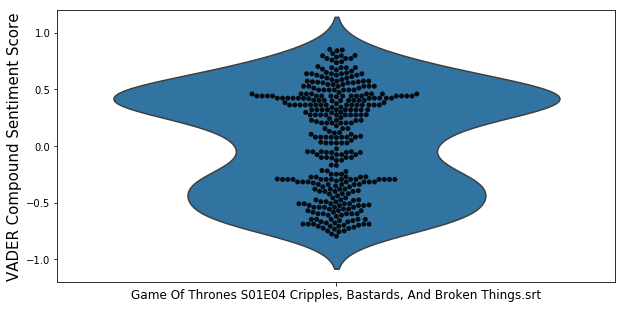

In [114]:
# Plot each episode
plt.close()
plt.figure(figsize=(10,5))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Name',y='compound',data=ep4_df,inner=None)
sns.swarmplot(x="Name", y="compound",data=ep4_df, color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1.png')
plt.show()

In [100]:
eptitles

['Game Of Thrones S01E01 Winter Is Coming.srt',
 'Game Of Thrones S01E02 The Kingsroad.srt',
 'Game Of Thrones S01E03 Lord Snow.srt',
 'Game Of Thrones S01E04 Cripples, Bastards, And Broken Things.srt',
 'Game Of Thrones S01E05 The Wolf And The Lion.srt',
 'Game Of Thrones S01E06 A Golden Crown.srt',
 'Game Of Thrones S01E07 You Win Or You Die.srt',
 'Game Of Thrones S01E08 The Pointy End.srt',
 'Game Of Thrones S01E09 Baelor.srt',
 'Game Of Thrones S01E10 Fire And Blood.srt']